In [1]:
import pandas as pd

In [8]:
df =pd.read_csv(r'C:\Users\andre\Documents\Data Science Georgetown\heart_failure_clinical_records_dataset.csv')

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Hypothesis 

Is there a relationship between age and heart failure?
Is there a relathionship between sex and heart failure?

## The Data 

List all the features that we included and a short description 
 
 
We found this data set on Kaggle. We did not clean the data as there was no missing data. 
No features that we dropped from the original data set 



### Glossary 
anaemia	- a condition marked by a deficiency of red blood cells or of hemoglobin in the blood, resulting in pallor and weariness.
creatinine_phosphokinase - an enzyme expressed by various tissues and cell types. 
diabetes -	a disease in which the body’s ability to produce or respond to the hormone insulin is impaired, resulting in abnormal metabolism of carbohydrates and elevated levels of glucose in the blood and urine.
ejection_fraction -	the volumetric fraction of fluid ejected from a chamber with each contraction.
high_blood_pressure -when your blood pressure, the force of your blood pushing against the walls of your blood vessels, is consistently too high.
platelets	
serum_creatinine
serum_sodium

### List how many observations

In [13]:
df.shape

(299, 13)

### Missing data

In [16]:
#counting missing values 

df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Range 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


(299, 13)

# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEE273CDC8>,
      dtype=object)

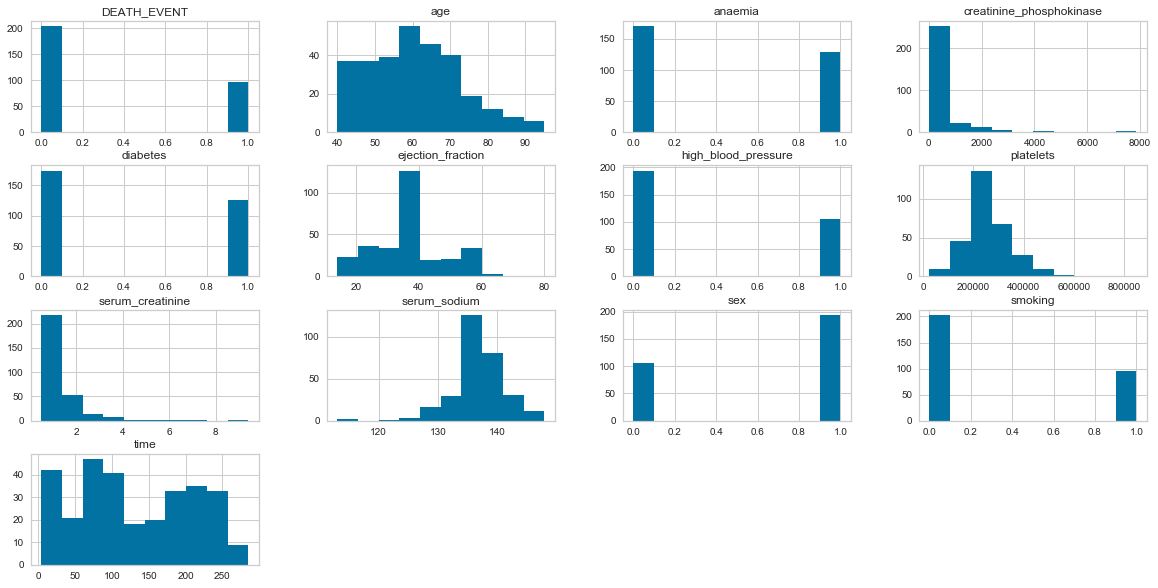

In [32]:
df.hist(figsize=(20,10))#Histogram of all features

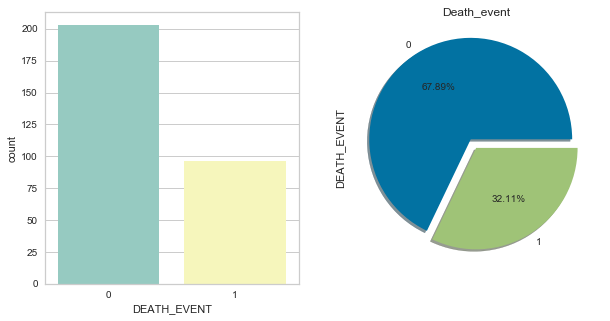

In [33]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data = df , x= "DEATH_EVENT" ,palette = "Set3" ,ax=ax[0])
plt.title("Death_event")
df.DEATH_EVENT.value_counts().plot.pie(explode =[0.1,0] ,autopct = "%0.2f%%" ,shadow = True ,ax = ax[1])
plt.show()

In [34]:
def outlier(data ,feature):
    plt.figure(figsize = (5,5))
    sns.boxplot(data[feature])
    plt.show()

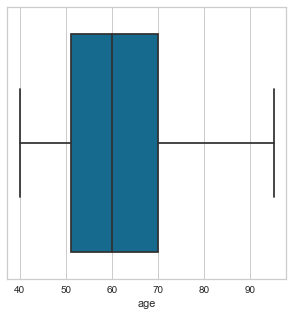

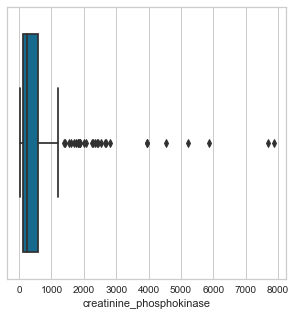

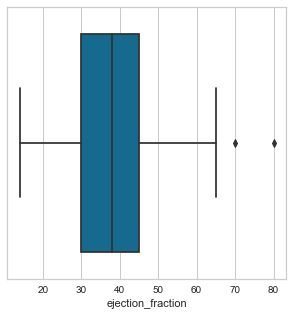

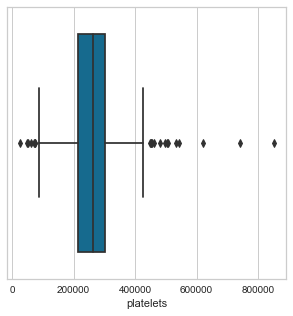

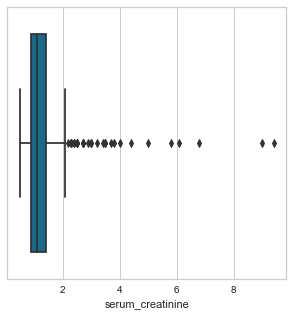

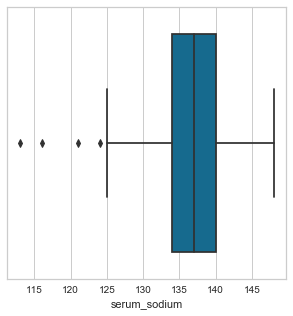

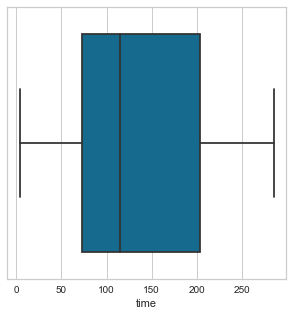

In [35]:
feature = ["age" , "creatinine_phosphokinase" ,"ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for var in feature:
    outlier(df,var)

In [36]:
def bivarient_conti(data , feature):
    plt.figure(figsize =(5,5))
    sns.lineplot(x = "age" , y = feature , hue = "DEATH_EVENT" , data = data)
    plt.title("Relationship between Age and Hue =DEATH_EVENT")
    plt.show()

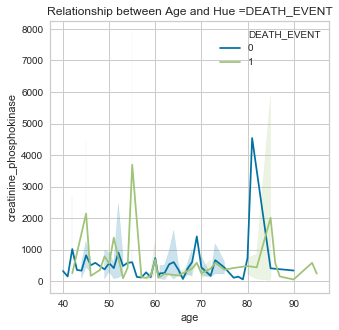

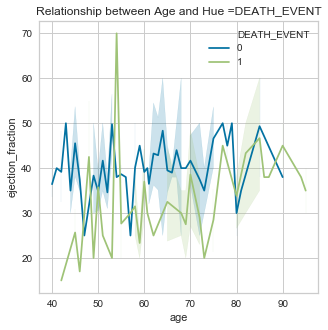

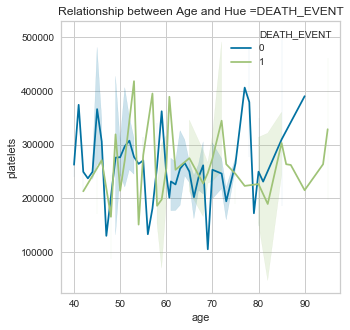

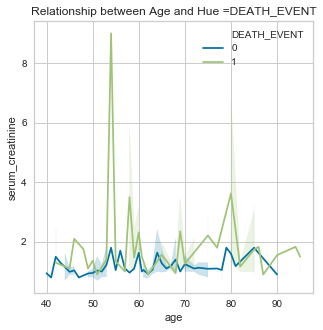

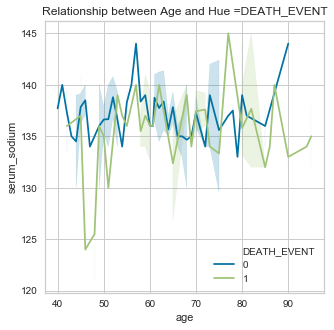

In [37]:
feature_c = [ "creatinine_phosphokinase" ,"ejection_fraction","platelets","serum_creatinine","serum_sodium"]
for var in feature_c:
    bivarient_conti(df,var)

## Feature Analysis 

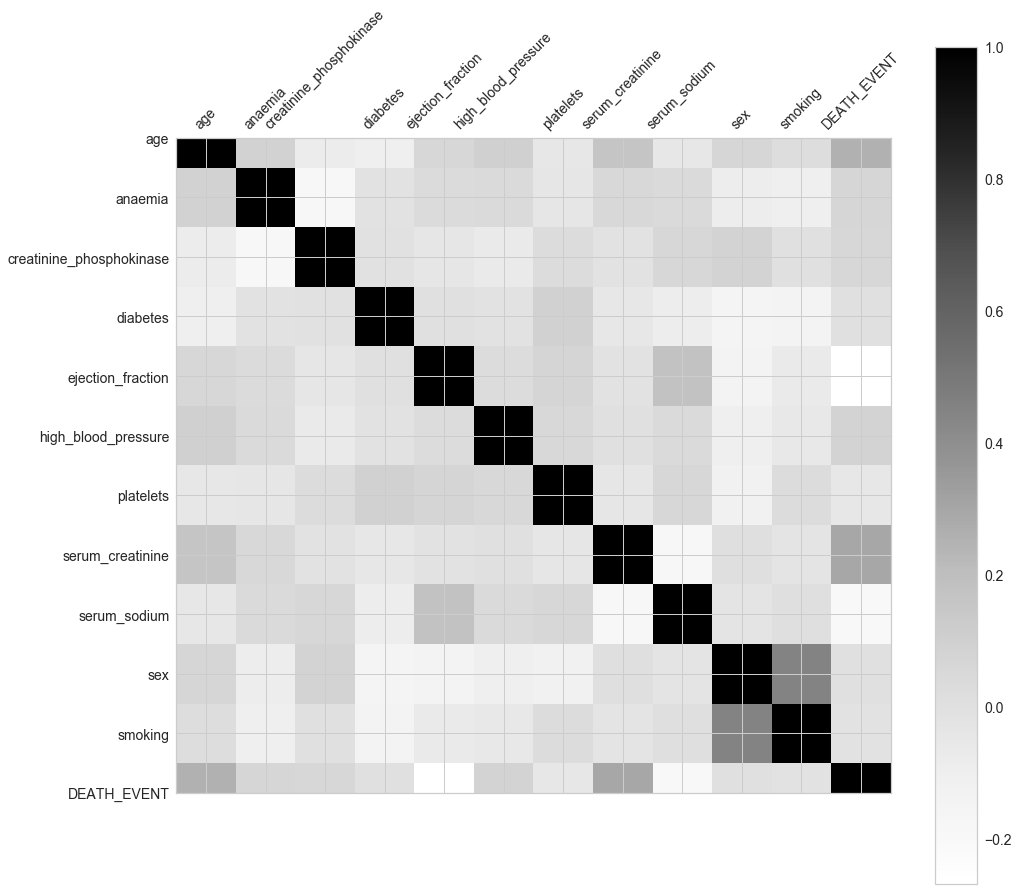

In [38]:
df = df.drop(['time'], axis=1)
f = plt.figure(figsize=(16, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [18]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', features=features, size=(1080, 720))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

NameError: name 'features' is not defined

## Machine Learning Model 

In [23]:
#split dataset in features and target variable
feature_cols = ['diabetes', 'anaemia', 'age','sex','high_blood_pressure','platelets']
X = df[feature_cols] # Features
y = df['DEATH_EVENT'] # Target variable



## Splitting data

In [26]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[48,  0],
       [27,  0]], dtype=int64)

In [29]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

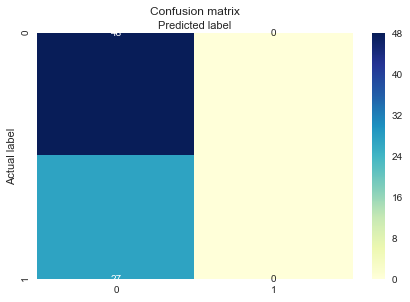

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.64
Precision: 0.0
Recall: 0.0


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Findings and Conclusion 

## Data Source 

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

# Load Final product into GitHub repo 
https://github.com/georgetown-analytics/XBUS-507-01.Applied_Data_Science